In [287]:
# converts a remote bunch of data files into a data year
import numpy as np
import datetime as dt
import copy
from scipy import stats
from dateutil.relativedelta import relativedelta
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sys import path
from imp import reload
path.insert(0, '/Users/H/WAVES/geo_data_group/')
import data_year as dy
path.insert(0, '/Users/H/PREMELT/Budget/PIOMAS/Michel_git/')
import budget_inputs as bi
import remote_data_year as rdy
reload(rdy)
reload(dy)
reload(bi)

<module 'budget_inputs' from '/Users/H/PREMELT/Budget/PIOMAS/Michel_git/budget_inputs.py'>

In [12]:
# path = '/Volumes/BU_extra/BUDGET/Pathfinderv4/'
# P = bi.Pathfinder(path)
path = '/Volumes/BU_extra/BUDGET/PIOMAS_data/'
P = bi.PIOMAS(path)

In [117]:
ts = dt.datetime(2014,1,1)
te = dt.datetime(2014,12,31)
P.get_dates(ts,te)

PIOMAS Found 365 dates


In [85]:
class rdy_input():
    def __init__(self,Dobj):
        ###
        self.Dobj = Dobj
        
    def __getitem__(self,indx):
        t_p,m,n = indx
        # can we convert an a:b version of t_p
        # to a list of dates??
        d = self.Dobj.dates[t_p]
        if type(d) == dt.datetime:
            d= [d]
        ## call some sort of data collection on d 
        array = self.Dobj.get_data(d)
        return array[:,m,n]
    def __array__(self):
        return 

In [121]:
Dobj = P

In [166]:
Dobj.get_data = Dobj.get_hi

In [186]:
Prdy = rdy.remote_data_year(Dobj,366)

In [170]:
np.shape(Prdy.mask)

(365, 360, 120)

In [194]:
periods = Prdy.get_periods(ts,te)
# periods = [1,2,3]
Prdy.mask = Prdy[:,:,:] > 0.15
# Prdy.mask = False
test = Prdy.clim_map(periods,mask=True)

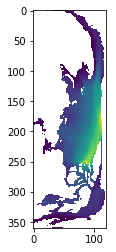

In [195]:
plt.imshow(test)
plt.show()

In [66]:
class rvdy_input():
    def __init__(self,Dobj):
        ###
        self.Dobj = Dobj
        
    def __getitem__(self,indx):
        t_p,m,n = indx
        # can we convert an a:b version of t_p
        # to a list of dates??
        d = self.Dobj.dates[t_p]
        if type(d) == dt.datetime:
            d= [d]
        ## call some sort of data collection on d 
        xarray,yarray = self.Dobj.get_vector(d)
        return xarray[:,m,n], yarray[:,m,n]
    
class rvdy_xinput(rvdy_input):
    def __init__(self,Dobj):
        ###
        super().__init__(Dobj)
        
    def __getitem__(self,indx):
        t_p,m,n = indx
        x,y = super().__getitem__(indx)
        return x
    
class rvdy_yinput(rvdy_input):
    def __init__(self,Dobj):
        ###
        super().__init__(Dobj)
        
    def __getitem__(self,indx):
        t_p,m,n = indx
        x,y = super().__getitem__(indx)
        return y 

In [191]:
Dobj.get_vector = Dobj.get_vels

In [204]:
Prvdy = rdy.remote_vec_data_year(Dobj,365)

In [205]:
Prvdy.x

In [206]:
test = Prvdy.clim_map(periods,magnitude=True)

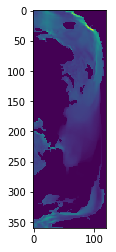

In [207]:
plt.imshow(test)
plt.show()

In [209]:
rvdyx = rdy.rvdy_xinput(Dobj)
rvdyy = rdy.rvdy_yinput(Dobj)

In [229]:
path = '/Volumes/BU_extra/BUDGET/Pathfinderv4/'
Pf = bi.Pathfinder(path)
# path = '/Volumes/BU_extra/BUDGET/PIOMAS_data/'
# P = bi.PIOMAS(path)

In [302]:
ts = dt.datetime(2012,1,1)
te = dt.datetime(2012,12,31)
Pf.get_dates(ts,te)

Pathfinder Found 366 dates


In [303]:
Pf.get_vector = Pf.get_vels

In [304]:
Pfvdy = rdy.remote_vec_data_year(Pf,periods = 366)

loading new year of data: 2012


In [324]:
y0 = 2012
m =0
tps = dt.datetime(y0,m+1,1)
tpe = tps + relativedelta(months =1, days=-1)
periods = Pfvdy.get_periods(tps,tpe)
periods,tpe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 datetime.datetime(2012, 1, 31, 0, 0))

In [325]:
Pfvdy.dates[0]

datetime.datetime(2012, 1, 1, 0, 0)

In [305]:
periods = [34,35,56]
# when working on remote data - best to only map one year at a time
# otherwise super super slow and it loads/reloads too much data
test = Pfvdy.clim_map(periods,year_set=[1,1],magnitude=True)

year_set inconistent with data, ignoring it


/Users/H/WAVES/geo_data_group/data_year.py:950: RuntimeWarning: Mean of empty slice
  axis = 0)


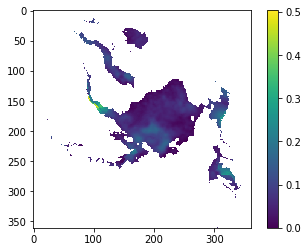

In [306]:
plt.imshow(test)
plt.colorbar()
plt.show()

In [181]:
# test = rdyi[3:7,100:110,100:110]
test = np.nanmean(rdyi[300:310,:,:],axis=(1,2))
test = np.nanmean([rdyi[i] for i in [1,2,3]],axis=0)
np.shape(test)

(1, 360, 120)

In [75]:
Dobj.dates[3]

datetime.datetime(2014, 1, 4, 0, 0)

In [183]:
np.shape(rdyi[1])

(1, 360, 120)

In [98]:
testd = np.empty([1,2,3])
testd.shape

(1, 2, 3)